In [ ]:
import sympy as sy #Madule untuk simbol
import matplotlib.pyplot as plt #Modul untuk membuat plot
from tabulate import tabulate # Module untuk membuat tabel
import numpy as np # Module untuk list

def LagrangePol(x,x_points,y_points):
    pol = 0
    n = len(x_points)
    for k in range (n):
        L = 1
        for i in range (n):
            if i != k :
                L*= ((x-x_points[i])/(x_points[k]-x_points[i])) # rumus untuk menentukan notasi produk pi dari (x-xi)/(xk-xi)
        pol += y_points[k]*L
    return pol

def DDTableGenerator(x_points,y_points): #buat fungsi untuk membuat tabel DD
    DDTable = [y_points]#kolom-kolom pada tabel. Kolom pertama berisi f
    for column in range(1,len(y_points)):#isi dari setiap kolom
        DDcolumn = []
        for row in range(len(DDTable[-1])-1): #mulai mengisi kolom tabel
            DD = (DDTable[-1][row+1]-DDTable[-1][row])/(x_points[column+row]-x_points[row]) #Ini rumus untuk aproksimasinya tapi row sama columnnya terbalik
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) #tambahkan kolom yang telah diisi ke tabel
    return DDTable

def ForwardDD(x,x_points,y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x(n-1))
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
    return pol

def BackwardDD(x,x_points,y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
    return pol

o = 1
while True: # menggunakan while True agar dapat diulang terus menerus dan berhenti jika dan hanya jika diperintah untuk berhenti (break)
    try_ = sy.Symbol(input('Do you wanna try it? (Y/N): ')) # nilai y atau n nya dijadikan simbol agar dapat terbaca
    if try_ == sy.Symbol('y') or try_ == sy.Symbol('Y'): # di sini di perintahkan juga sy.symbol biar yang sebelumnya kedeteksi
        titik_x = eval (input ('List of x points: ')) # Input nilai x
        titik_y = eval (input ('List of y points: ')) # Input nilai y
        eval_x = eval (input ('Input x value to be approximated: ')) # Titik x yang ingin di aproksimasi
    
        metode = int(input('Choose your preferred method (1 = Lagrange, 2 = NDD): ')) # Memberi pilihan metode lagrange atau NDD
        for a in range (o):
            if metode == 1: # Buat lagrange
                y_approx = LagrangePol (eval_x,titik_x,titik_y) # Karena tadi udah didefinisiin sebelum masuk loop jadi tinggal kasih inisial
                print('For x = {0}, using Lagrange, y is approximately {1:.7f}'.format(eval_x,y_approx)) # Di print untuk menampilkan hasil aproksimasi
                def LagrangeDisplay(x_points,y_points): # Karena yang tadi gak cukup jadibuat baru definisi biar bisa keliatan polinomialnya
                    x = sy.Symbol('x') # Disimbolin jadi x dulu biar gak dihitung
                    pol = 0 
                    for g in range (len(x_points)): # Definisinya sama aja seperti yang LagrangePol tapi bedanya di return
                        L = 1
                        for h in range (len(x_points)):
                            if h != g:
                                L *= (x-x_points[h])/(x_points[g]-x_points[h])
                        pol += y_points[g]*L
                    return str(sy.simplify(pol)) #returnnya di sini gunain sy.simplify buat nyederhanakan kemudian lanjur lagi string
                y_display = LagrangeDisplay(titik_x,titik_y) #Inisialin LagrangeDisplay
                print ('Lagrange Polynomial = {0}'.format(y_display)) #print
            
            elif metode == 2:
                
                DDTable = DDTableGenerator(titik_x,titik_y) #Inisialin DDTableGeneratornya biar nanti kedeteksi gitu xnya
                opsi = int(input('Forward = 1, Backward = 2: ')) #Buat opsi kalau 1 forward, 2 backward
                opsi_table = sy.Symbol(input('Wanna print the DD Table?(Y/N): ')) #Buat opsi khusus untuk buat tabel NDD
                
                for c in range (o):
                    if opsi_table == sy.Symbol('y') or opsi_table == sy.Symbol('Y'):
                        def DDTableG(DDTable,x_points): #buat fungsi untuk membuat tabel DD
                            list_table = [] # tabel yang kosong yang nantinya bakal diisi pake for loopnya
                            for r in range(len(DDTable)): #Ini tuh gunanya buat nambahin definisi DDTableGenerator yang sebelumnya
                                r_table = []#Buat kolom kosongnya
                                for s in range (len(DDTable[r])):
                                    r_table.append(DDTable[s][r])
                                list_table.append(r_table)
                            for t in range(len(list_table)): # Loop buat menambahkan elemen x_points ke dalam tabel
                                list_table[t].insert(0,x_points[t]) #Caranya pake insert
                            return list_table
                        table_display = DDTableG(DDTableGenerator(titik_x,titik_y),titik_x) #Kasih inisial buat di print
                        print(tabulate(table_display,headers = ['x','y','NDD1','NDD2','NDD3','NDD4','NDD5','NDD6'], tablefmt = 'orgtbl')) #Buat tabelnya
                    elif opsi_table == sy.Symbol('n') or opsi_table == sy.Symbol('N'): #Kalo gak yaudah lanjut keluar dari loopingnya
                        continue
                        
                for b in range (o):
                    if opsi == 1: 
                        def ForwardDDDisplay(x,x_points,y_points):
                            x = sy.Symbol('x') #Jadiin simbol lagi biar gak dihitung nantinya agar jadi polinom bukan integer
                            DDTable = DDTableGenerator(x_points,y_points)
                            pol = DDTable[0][0] #nilai dari polinom. Inisiasi : suku pertama po
                            mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x(n-1))
                            for k in range(1,len(DDTable)):
                                mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
                                pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
                            return str(sy.simplify(pol)) #sederhanain pol kemudian jadikan string
                        y_display = ForwardDDDisplay(eval_x,titik_x,titik_y) #Inisialin
                        print('NDD Polynomial: {0}'.format(y_display)) #Print
                        y_approx = ForwardDD(eval_x,titik_x,titik_y) #Inisialin definisi ForwardDD
                        print('For x = {0}, using Forward NDD, y is approximately {1:.7f}'.format(eval_x,y_approx))              
                    
                    elif opsi == 2:
                        def BackwardDDDisplay(x,x_points,y_points):
                            x = sy.Symbol('x') #Jadikan x sebagai simbol agar nilainya bukan berupa integer atau float nantinya
                            DDTable = DDTableGenerator(x_points,y_points) #inisialin
                            pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
                            mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))
                            for k in range(1,len(DDTable)):
                                mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
                                pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
                            return str(sy.simplify(pol)) #sederhanain, jadiin string
                        y_display = BackwardDDDisplay(eval_x,titik_x,titik_y) #inisialin
                        print('NDD Polynomial: {0}'.format(y_display))#print
                        y_approx = BackwardDD(eval_x,titik_x,titik_y) #Inisialin definisi BackwardDD
                        print('For x = {0}, using Backward NDD, y is approximately {1:.7f}'.format(eval_x,y_approx))
                        
        show = int(input('Show (1 = table, 2 = plot): ')) #Kasih pilihan
        if show == 1:
            x_= np.append(titik_x,eval_x) #Gabungin titik x dan titik x evalnya
            y_= np.append(titik_y,y_approx) # Menggabungkan titik y dan titik hasil aproksimasinya
            x_column = np.sort(x_) # Diurutkan nilai x nya
            y_column = np.sort(y_) #Diurutkan nilai ynya
            print('Result') #Pengen ngasih nama tapi yaudah print aja result
            print(tabulate({'x':x_column,'y':y_column},headers = ['x','y'], tablefmt ='orgtbl')) #print tabelnya
        elif show == 2:
            def f(x):
                return eval(y_display) # y_displaynya didefinisiin f(x) terus di eval dulu biar nanti bisa masukin nilai xnya
            u = np.linspace(titik_x[0],titik_x[-1])
            plt.plot(u,f(u)) # Grafik polinom Interpolasi
            plt.plot(eval_x,y_approx,'r-o') # Titik Interpolasi
            plt.plot(titik_x,titik_y,'g-') # Titik-titik x y atau fungsi ynya yang nanti dibuat grafik 
            plt.legend(['Polinom Interpolasi','Titik yang Diinterpolasikan', 'Fungsi / Titik Input']) #Buat namain atau ngasih label tanda grafiknya
            plt.title('Grafik Input dan Polinomial Interpolasi') #Buat namain kotakan grafiknya atau plotnya
            plt.show() #show

    elif try_ == sy.Symbol('n') or try_ == sy.Symbol('N'): #Kalo udah gak mau lagi yaudah berhenti
        break

Do you wanna try it? (Y/N): y
List of x points: [0,2,4,6]
List of y points: [1,7.3891,54.5982,403.4288]
Input x value to be approximated: 3.5
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
For x = 3.5, using Lagrange, y is approximately 24.7064680
Lagrange Polynomial = 5.43336458333333*x**3 - 27.4976875*x**2 + 36.4564666666667*x + 1.0
Show (1 = table, 2 = plot): 1
Result
|   x |        y |
|-----+----------|
| 0   |   1      |
| 2   |   7.3891 |
| 3.5 |  24.7065 |
| 4   |  54.5982 |
| 6   | 403.429  |
Do you wanna try it? (Y/N): y
List of x points: [1,2,3,4]
List of y points: [1,8,27,64]
Input x value to be approximated: 4
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
For x = 4, using Lagrange, y is approximately 64.0000000
Lagrange Polynomial = x**3
Show (1 = table, 2 = plot): 1
Result
|   x |   y |
|-----+-----|
|   1 |   1 |
|   2 |   8 |
|   3 |  27 |
|   4 |  64 |
|   4 |  64 |
Do you wanna try it? (Y/N): y
List of x points: [0,2,4,6]
List of y points: [1,7.3891

Program ini adalah program yang dibuat oleh Widyadari Dhiya Parahita untuk mencetak nilai aproksimasi, tabel hasil, ataupun plot jika diketahui titik-titik x dan titik-titik y, serta nilai x yang ingin diketahui nilai aproksimasi untuk di titik y. Kita dapat melakukan dengan 3 metode Lagrange, Forward NDD, atau Backward NDD.
Berikut algoritmanya:
1. Kita import dulu module yang dibutuhkan pada syntax ini. sympy, matplotlib.pyplot, tabulate, dan numpy.
2. Kita definisikan semua definisi yang telah diajarkan di praktikum 3, LagrangePol, DDTableGenerator, ForwardDD, dan BackwardDD.
3. Dari lagrange, hasil polinomialnya itu diinisialkan jadi nol dulu. Kemudian, diinisialkan lagi len(x_points) sebagai n. Karena nilai i = k-1, jadi buat 2 for loop. For loop k dan di dalamnya ada for loop i. Masukin rumus lagrangenya.
4. Kemudian ada DDTableGenerator, ini mirip kayak lagrange idenya dua for loop gitu gunanya buat masukin ke kolom sama rownya. Tapi pas dicoba dia jadinya hasilnya bakal transpose tapi bakal benar nilainya. Kenapa nilainya kayak matrix yang ditranspose? Karena ada [-1][row+1] ada juga yang [-1][row] yang mana kolom terlebih dahulu baru baris. Terus ketika langsung diprint sempat error jika sebaliknya. Oleh karena itu untuk menampilkan tabelnya akan didefinisikan lagi di loop nanti.
5. Untuk ForwardDD dan BackwardDD ini mirip hanya perbedaan dirumus aja. Idenya kita akan panggil inisial dari DDTableGenerator kemudian kita akan masuk ke for loop dan memasukkannya dengan rumus forward ndd atau backward ndd. Perbedaan definisinya adalah terletak dibagian kolom inisial DDTableGeneratornya. Hasilnya nanti akan diinisialkan di dalam loop berupa y_approx.
6. Selanjutnya, akan di buat o = 1 gunanya untuk membantu setiap loopnya nanti.
7. Masuk di while loop gunanya untuk melakukan looping secara terus menerus yang akan diberhentikan jika kita mengklik N atau n yang akan diarahkan untuk break. Kemudian, y atau Y untuk melanjutkan atau menjalankan program.
(Catatan : untuk setiap pilihan y or n di sini aku menggunakan sy.symbol)
8. Inisialkan try_ untuk menginput pilihan menjalankan program atau tidak dengan catatan menggunakan simbol
9. Masuk ke if seperti yang dikatakan di poin 7 kalo y berarti menjalankan dan n berarti break. Di sini kita akan menjalankan program terlebih dahulu.
10. Inisialkan titik_x,titik_y, dan eval_x untuk menginput tititk-titik yang harus diinput,seperti titik x, y, dan titik yang akan dicari nilai aproksimasinya.
11. Inisialkan metode untuk menginput opsi metode apa yang ingin digunakan terdapat dua pilihan ingin Lagrange atau NDD
12. Kemudian jika lagrange, kita akan menginisialkan hasil aproksimasinya sebagai y_approx (hal ini berlaku juga untuk metode NDD setiap hasilnya akan diinisialkan sama). Agar ketika dipanggil cukup 1 inisial saja. Selanjutnya akan didefinisikan suatu untuk menampilkan polinomialnya. Rumusnya sama seperti mencari nilai polinomialnya. Perbedaanya hanya pada x nya kita jadikan simbol dan polnya kita sederhanakan dan kita ubah menjadi string, sehingga akan didapatkan bentuk fungsinya. Lanjut dicetak.
13. Jika kita memilih metode 2 atau NDD, kita akan menginisialkan dari definisi DDTableGenerator, inisial untuk menginput opsi mau menggunakan forward atau backward, serta opsi ingin menampilkan table ndd atau tidak.
14. Karena yang keluar tabel duluan di contoh, jadi ikutin aja. Kita masuk ke loop untuk tabel (sebenarnya gak di loop juga bisa, tapi biar keliatan aja mana yang buat tabel mana yang buat menampilkan yang berkaiatan sama forward dan backward).
15. Masuk ke opsi untuk menampilkan tabel. Idenya itu dengan menambahkan DDTable (inisial dari DDTableGenerator). Setiap elemennya akan ditambahkan ke list kosong. Ada 2 loop di dalamnya, gunanya untuk memasukkan sesuai baris dan kolom. Keluar dari loop di dalam loop, buat loop baru untuk menambahkan elemen x_points di kolom awal. Kemudian, inisialkan sebagai table_display. Lalu print. Keluar dari ifnya, kita liat ke if yang n atau menskip pembuatan tabelnya. nanti bakal di continue.
16. Keluar dari loop pembuatan tabel. Masuk kedalam loop untuk segala yang berkaitan dengan forward ndd dan backward ndd.
17. Jika sebelumnya memilih opsi 1 (Forward ndd), masuk ke if untuk forward ndd. Jika sebelumnya memilih opsi 2, masuk ke dalam if untuk backward ndd. Keduanya akan mendefinisikan terlebih dahulu untuk menampilkan polinomial yang berbentuk fungsi. Syntaxnya sama seperti membuat nilainya, perbedaannya hanya pada menjadikan x sebagai simbol kemudian mereturn pol dengan menyederhanakan menggunakan simplify dan menjadikannya sebagai string. Setelah itu, menginisialkan definisi tersebut. Kemudian print untuk menampilkan polinomial. Lanjut lagi, inisialkan definisi untuk menghitung forward atau backward yang telah di definisikan sebelum while loop. Kemudian print.
18. Keluar dari loop untuk pemilihan metode yang digunakan karena ini akan berkaitan secara keseluruhan, yaitu memperlihatkan hasil.
19. Kita inisialkan show untuk menginput opsi 1 (tabel result) atau 2 (plot)
20. Masuk ke if untuk table result inisialkan x_ yang nantinya akan ditambahkan elemen dari x_points dan eval_x. Inisialkan juga y_ untuk ditambahkan dengan y_points dan y_approx. Kemudian urutkan elemen x_ dan y_ menggunakan sort. (Catatan: Ini diurutkannya berdasarkan kolomnya jadi anggapannya x_ dan y_ bisa jadi berkaitan ataupun tidak berkaitan). Lalu print.
21. Jika memilih if yang berkaitan dengan plot, kita akan mendefinisikan f(x) yang mana nantinya akan di eval terlebih dahulu nilai y_approx. Kemudian inisialkan nilai untuk membuat batas bawah dan batas atas (u). Plot (u,f(u)), (eval_x,y_approx), dan (titik_x,titik_). Warna dan bentuk sesuai keinginan aja. Buat label untuk menamakan tiap warna dan bentuk plotnya dengan plt.legend. Lanjut buat title dengan plt.title dan show dengan plt.show().
22. Keluar if yang melanjutkan program. Nanti akan muncul lagi inisial try_ kita akan disuruh memilih mau lanjut program atau tidak. Jika tidak maka dia akan masuk ke if n yang mana nantinya program akan dihentikan oleh break.

## Nomor 2

Do you wanna try it? (Y/N): y
List of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
List of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
Input x value to be approximated: 3.5
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
For x = 3.5, using Lagrange, y is approximately -18.6827641
Lagrange Polynomial = 269.7993318656*x**7 - 6104.14917877837*x**6 + 58230.4977178019*x**5 - 303330.788902977*x**4 + 931166.260016076*x**3 - 1683847.75827344*x**2 + 1660836.09152256*x - 689558.401638994
Show (1 = table, 2 = plot): 1
Result
|    x |        y |
|------+----------|
| 2    | -18.6828 |
| 2.15 |   4.9    |
| 2.25 |   6.4    |
| 2.3  |   8.1    |
| 3.38 |  14.1    |
| 3.5  |  18.1    |
| 4.1  |  22.1    |
| 4.24 |  24.9    |
| 4.5  |  29.1    |
Do you wanna try it? (Y/N): y
List of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
List of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
Input x value to be approximated: 3.5
Choose your preferred method (1 = Lagrange, 2 = NDD): 1
For x = 3.5

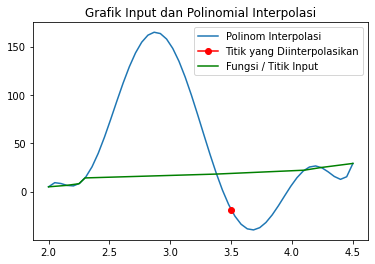

Do you wanna try it? (Y/N): y
List of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
List of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
Input x value to be approximated: 3.5
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 1
Wanna print the DD Table?(Y/N): y
|      |    x |         y |       NDD1 |       NDD2 |       NDD3 |       NDD4 |      NDD5 |    NDD6 |
|------+------+-----------+------------+------------+------------+------------+-----------+---------|
| 2    |  4.9 |  10       |   28       | 2195.56    | -2056.15   | 1149.6     | -594.847  | 269.799 |
| 2.15 |  6.4 |  17       |  686.667   | -641.938   |   358.013  | -182.853   |   79.6515 |         |
| 2.25 |  8.1 | 120       | -102.917   |   56.187   |   -24.1506 |    4.32776 |           |         |
| 2.3  | 14.1 |   3.7037  |    1.02881 |    8.12735 |   -14.4131 |            |           |         |
| 3.38 | 18.1 |   5.55556 |   16.7959  |  -23.5815  |            |            |           

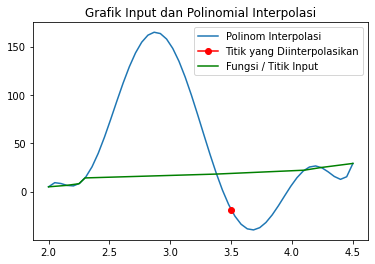

Do you wanna try it? (Y/N): y
List of x points: [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
List of y points: [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
Input x value to be approximated: 3.5
Choose your preferred method (1 = Lagrange, 2 = NDD): 2
Forward = 1, Backward = 2: 2
Wanna print the DD Table?(Y/N): y
|      |    x |         y |       NDD1 |       NDD2 |       NDD3 |       NDD4 |      NDD5 |    NDD6 |
|------+------+-----------+------------+------------+------------+------------+-----------+---------|
| 2    |  4.9 |  10       |   28       | 2195.56    | -2056.15   | 1149.6     | -594.847  | 269.799 |
| 2.15 |  6.4 |  17       |  686.667   | -641.938   |   358.013  | -182.853   |   79.6515 |         |
| 2.25 |  8.1 | 120       | -102.917   |   56.187   |   -24.1506 |    4.32776 |           |         |
| 2.3  | 14.1 |   3.7037  |    1.02881 |    8.12735 |   -14.4131 |            |           |         |
| 3.38 | 18.1 |   5.55556 |   16.7959  |  -23.5815  |            |            |           

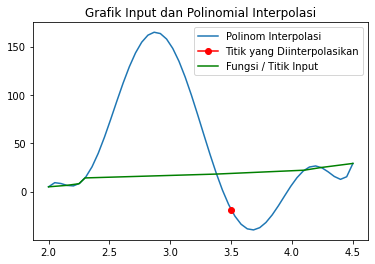

Do you wanna try it? (Y/N): n


In [194]:
import sympy as sy #Madule untuk simbol
import matplotlib.pyplot as plt #Modul untuk membuat plot
from tabulate import tabulate # Module untuk membuat tabel
import numpy as np # Module untuk list

def LagrangePol(x,x_points,y_points):
    pol = 0
    n = len(x_points)
    for k in range (n):
        L = 1
        for i in range (n):
            if i != k :
                L*= ((x-x_points[i])/(x_points[k]-x_points[i])) # rumus untuk menentukan notasi produk pi dari (x-xi)/(xk-xi)
        pol += y_points[k]*L
    return pol

def DDTableGenerator(x_points,y_points): #buat fungsi untuk membuat tabel DD
    DDTable = [y_points]#kolom-kolom pada tabel. Kolom pertama berisi f
    for column in range(1,len(y_points)):#isi dari setiap kolom
        DDcolumn = []
        for row in range(len(DDTable[-1])-1): #mulai mengisi kolom tabel
            DD = (DDTable[-1][row+1]-DDTable[-1][row])/(x_points[column+row]-x_points[row]) #Ini rumus untuk aproksimasinya tapi row sama columnnya terbalik
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) #tambahkan kolom yang telah diisi ke tabel
    return DDTable

def ForwardDD(x,x_points,y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x(n-1))
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
    return pol

def BackwardDD(x,x_points,y_points):
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
    mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))
    for k in range(1,len(DDTable)):
        mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
    return pol

o = 1
while True: # menggunakan while True agar dapat diulang terus menerus dan berhenti jika dan hanya jika diperintah untuk berhenti (break)
    try_ = sy.Symbol(input('Do you wanna try it? (Y/N): ')) # nilai y atau n nya dijadikan simbol agar dapat terbaca
    if try_ == sy.Symbol('y') or try_ == sy.Symbol('Y'): # di sini di perintahkan juga sy.symbol biar yang sebelumnya kedeteksi
        titik_x = eval (input ('List of x points: ')) # Input nilai x
        titik_y = eval (input ('List of y points: ')) # Input nilai y
        eval_x = eval (input ('Input x value to be approximated: ')) # Titik x yang ingin di aproksimasi
    
        metode = int(input('Choose your preferred method (1 = Lagrange, 2 = NDD): ')) # Memberi pilihan metode lagrange atau NDD
        for a in range (o):
            if metode == 1: # Buat lagrange
                y_approx = LagrangePol (eval_x,titik_x,titik_y) # Karena tadi udah didefinisiin sebelum masuk loop jadi tinggal kasih inisial
                print('For x = {0}, using Lagrange, y is approximately {1:.7f}'.format(eval_x,y_approx)) # Di print untuk menampilkan hasil aproksimasi
                def LagrangeDisplay(x_points,y_points): # Karena yang tadi gak cukup jadibuat baru definisi biar bisa keliatan polinomialnya
                    x = sy.Symbol('x') # Disimbolin jadi x dulu biar gak dihitung
                    pol = 0 
                    for g in range (len(x_points)): # Definisinya sama aja seperti yang LagrangePol tapi bedanya di return
                        L = 1
                        for h in range (len(x_points)):
                            if h != g:
                                L *= (x-x_points[h])/(x_points[g]-x_points[h])
                        pol += y_points[g]*L
                    return str(sy.simplify(pol)) #returnnya di sini gunain sy.simplify buat nyederhanakan kemudian lanjur lagi string
                y_display = LagrangeDisplay(titik_x,titik_y) #Inisialin LagrangeDisplay
                print ('Lagrange Polynomial = {0}'.format(y_display)) #print
            
            elif metode == 2:
                
                DDTable = DDTableGenerator(titik_x,titik_y) #Inisialin DDTableGeneratornya biar nanti kedeteksi gitu xnya
                opsi = int(input('Forward = 1, Backward = 2: ')) #Buat opsi kalau 1 forward, 2 backward
                opsi_table = sy.Symbol(input('Wanna print the DD Table?(Y/N): ')) #Buat opsi khusus untuk buat tabel NDD
                
                for c in range (o):
                    if opsi_table == sy.Symbol('y') or opsi_table == sy.Symbol('Y'):
                        def DDTableG(DDTable,x_points): #buat fungsi untuk membuat tabel DD
                            list_table = [] # tabel yang kosong yang nantinya bakal diisi pake for loopnya
                            for r in range(len(DDTable)): #Ini tuh gunanya buat nambahin definisi DDTableGenerator yang sebelumnya
                                r_table = []#Buat kolom kosongnya
                                for s in range (len(DDTable[r])):
                                    r_table.append(DDTable[s][r])
                                list_table.append(r_table)
                            for t in range(len(list_table)): # Loop buat menambahkan elemen x_points ke dalam tabel
                                list_table[t].insert(0,x_points[t]) #Caranya pake insert
                            return list_table
                        table_display = DDTableG(DDTableGenerator(titik_x,titik_y),titik_x) #Kasih inisial buat di print
                        print(tabulate(table_display,headers = ['x','y','NDD1','NDD2','NDD3','NDD4','NDD5','NDD6'], tablefmt = 'orgtbl')) #Buat tabelnya
                    elif opsi_table == sy.Symbol('n') or opsi_table == sy.Symbol('N'): #Kalo gak yaudah lanjut keluar dari loopingnya
                        continue
                        
                for b in range (o):
                    if opsi == 1: 
                        def ForwardDDDisplay(x,x_points,y_points):
                            x = sy.Symbol('x') #Jadiin simbol lagi biar gak dihitung nantinya agar jadi polinom bukan integer
                            DDTable = DDTableGenerator(x_points,y_points)
                            pol = DDTable[0][0] #nilai dari polinom. Inisiasi : suku pertama po
                            mult_term = 1 #variabel untuk menyimpan nilai dari (x-x0)(x-x(n-1))
                            for k in range(1,len(DDTable)):
                                mult_term*=(x-x_points[k-1]) #menghitung (x-x0)(x-x1)...(x-x(n-1))
                                pol+=DDTable[k][0]*mult_term #menghitung nilai interpolasi
                            return str(sy.simplify(pol)) #sederhanain pol kemudian jadikan string
                        y_display = ForwardDDDisplay(eval_x,titik_x,titik_y) #Inisialin
                        print('NDD Polynomial: {0}'.format(y_display)) #Print
                        y_approx = ForwardDD(eval_x,titik_x,titik_y) #Inisialin definisi ForwardDD
                        print('For x = {0}, using Forward NDD, y is approximately {1:.7f}'.format(eval_x,y_approx))              
                    
                    elif opsi == 2:
                        def BackwardDDDisplay(x,x_points,y_points):
                            x = sy.Symbol('x') #Jadikan x sebagai simbol agar nilainya bukan berupa integer atau float nantinya
                            DDTable = DDTableGenerator(x_points,y_points) #inisialin
                            pol = DDTable[0][-1] #nilai dari polinom. Inisiasi : suku pertama po
                            mult_term = 1 #variabel untuk menyimpan nilai dari (x-xn)(x-x(n-1))
                            for k in range(1,len(DDTable)):
                                mult_term*=(x-x_points[-k]) #menghitung (x-xn)(x-x(n-1))...(x-x1)
                                pol+=DDTable[k][-1]*mult_term #menghitung nilai interpolasi
                            return str(sy.simplify(pol)) #sederhanain, jadiin string
                        y_display = BackwardDDDisplay(eval_x,titik_x,titik_y) #inisialin
                        print('NDD Polynomial: {0}'.format(y_display))#print
                        y_approx = BackwardDD(eval_x,titik_x,titik_y) #Inisialin definisi BackwardDD
                        print('For x = {0}, using Backward NDD, y is approximately {1:.7f}'.format(eval_x,y_approx))
                        
        show = int(input('Show (1 = table, 2 = plot): ')) #Kasih pilihan
        if show == 1:
            x_= np.append(titik_x,eval_x) #Gabungin titik x dan titik x evalnya
            y_= np.append(titik_y,y_approx) # Menggabungkan titik y dan titik hasil aproksimasinya
            x_column = np.sort(x_) # Diurutkan nilai x nya
            y_column = np.sort(y_) #Diurutkan nilai ynya
            print('Result') #Pengen ngasih nama tapi yaudah print aja result
            print(tabulate({'x':x_column,'y':y_column},headers = ['x','y'], tablefmt ='orgtbl')) #print tabelnya
        elif show == 2:
            def f(x):
                return eval(y_display) # y_displaynya didefinisiin f(x) terus di eval dulu biar nanti bisa masukin nilai xnya
            u = np.linspace(titik_x[0],titik_x[-1])
            plt.plot(u,f(u)) # Grafik polinom Interpolasi
            plt.plot(eval_x,y_approx,'r-o') # Titik Interpolasi
            plt.plot(titik_x,titik_y,'g-') # Titik-titik x y atau fungsi ynya yang nanti dibuat grafik 
            plt.legend(['Polinom Interpolasi','Titik yang Diinterpolasikan', 'Fungsi / Titik Input']) #Buat namain atau ngasih label tanda grafiknya
            plt.title('Grafik Input dan Polinomial Interpolasi') #Buat namain kotakan grafiknya atau plotnya
            plt.show() #show

    elif try_ == sy.Symbol('n') or try_ == sy.Symbol('N'): #Kalo udah gak mau lagi yaudah berhenti
        break

Kesimpulannya, dengan menggunakan metode lagrange ataupun NDD nilai aproksimasinya akan sama. Namun, karena terjadi kekurangan node nilainya menjadi minus. Nilai hasil dalam result tablenya pun menjadi tidak berurutan.